In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"  # Apple Inc.
start_date = "2024-12-14"
end_date = "2024-12-21"

data = yf.download(ticker, start=start_date, end=end_date, interval="15m")
data.to_csv("AAPL_intraday_data.csv")
print("Data downloaded and saved as 'AAPL_intraday_data.csv'")




[*********************100%***********************]  1 of 1 completed

Data downloaded and saved as 'AAPL_intraday_data.csv'


In [7]:
df=pd.read_csv("AAPL_intraday_data.csv")
print(df.head())

                 Price               Close                High  \
0               Ticker                AAPL                AAPL   
1             Datetime                 NaN                 NaN   
2  2024-12-16 09:30:00   249.6999969482422               250.0   
3  2024-12-16 09:45:00  248.60499572753906   249.7899932861328   
4  2024-12-16 10:00:00  249.14999389648438  249.22999572753906   

                  Low                Open   Volume  
0                AAPL                AAPL     AAPL  
1                 NaN                 NaN      NaN  
2  247.64999389648438               248.0  3778383  
3  248.53500366210938   249.7100067138672  1279623  
4  248.49000549316406  248.61500549316406  1285872  


In [8]:
print("Dataset Information:")
print(data.info())
print("\nFirst 5 Rows of Data:")
print(data.head())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2024-12-16 09:30:00 to 2024-12-20 15:45:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   130 non-null    float64
 1   (High, AAPL)    130 non-null    float64
 2   (Low, AAPL)     130 non-null    float64
 3   (Open, AAPL)    130 non-null    float64
 4   (Volume, AAPL)  130 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.1 KB
None

First 5 Rows of Data:
Price                     Close        High         Low        Open   Volume
Ticker                     AAPL        AAPL        AAPL        AAPL     AAPL
Datetime                                                                    
2024-12-16 09:30:00  249.699997  250.000000  247.649994  248.000000  3778383
2024-12-16 09:45:00  248.604996  249.789993  248.535004  249.710007  1279623
2024-12-16 10:00:00  249.149994  249.229996  248.490005  248

In [14]:
df = df.dropna()

In [15]:
df

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
2,2024-12-16 09:30:00,249.6999969482422,250.0,247.64999389648438,248.0,3778383
3,2024-12-16 09:45:00,248.60499572753906,249.7899932861328,248.53500366210938,249.7100067138672,1279623
4,2024-12-16 10:00:00,249.14999389648438,249.22999572753906,248.49000549316406,248.61500549316406,1285872
5,2024-12-16 10:15:00,249.05999755859375,249.24000549316406,248.6999969482422,249.16000366210938,1543002
...,...,...,...,...,...,...
127,2024-12-20 14:45:00,253.60279846191406,253.75,253.3000030517578,253.60000610351562,847557
128,2024-12-20 15:00:00,253.77999877929688,253.85000610351562,253.5399932861328,253.61000061035156,1266016
129,2024-12-20 15:15:00,253.49000549316406,254.19000244140625,253.4199981689453,253.77499389648438,2126880
130,2024-12-20 15:30:00,253.6199951171875,253.8800048828125,252.7899932861328,253.5,1563709


In [9]:
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [10]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [13]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower={lower_bound}, Upper={upper_bound}")

('Close', 'AAPL'): Lower=246.56188774108887, Upper=257.2168712615967
('High', 'AAPL'): Lower=246.78375434875488, Upper=257.35374641418457
('Low', 'AAPL'): Lower=245.83549308776855, Upper=257.0667095184326
('Open', 'AAPL'): Lower=246.45811462402344, Upper=257.2531280517578
('Volume', 'AAPL'): Lower=-133713.25, Upper=2169028.75


In [12]:
if 'Datetime' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Datetime'])


In [32]:
numerical_cols

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [34]:
print(df.dtypes)

Price     float64
Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


In [28]:
print(df.dtypes)


Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [31]:
columns_to_convert = ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
print(df)
print(df.dtypes)

     Price       Close        High         Low        Open     Volume
0      NaN         NaN         NaN         NaN         NaN        NaN
2      NaN  249.699997  250.000000  247.649994  248.000000  3778383.0
3      NaN  248.604996  249.789993  248.535004  249.710007  1279623.0
4      NaN  249.149994  249.229996  248.490005  248.615005  1285872.0
5      NaN  249.059998  249.240005  248.699997  249.160004  1543002.0
..     ...         ...         ...         ...         ...        ...
127    NaN  253.602798  253.750000  253.300003  253.600006   847557.0
128    NaN  253.779999  253.850006  253.539993  253.610001  1266016.0
129    NaN  253.490005  254.190002  253.419998  253.774994  2126880.0
130    NaN  253.619995  253.880005  252.789993  253.500000  1563709.0
131    NaN  254.589996  255.000000  252.960007  253.610001  6897721.0

[131 rows x 6 columns]
Price     float64
Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


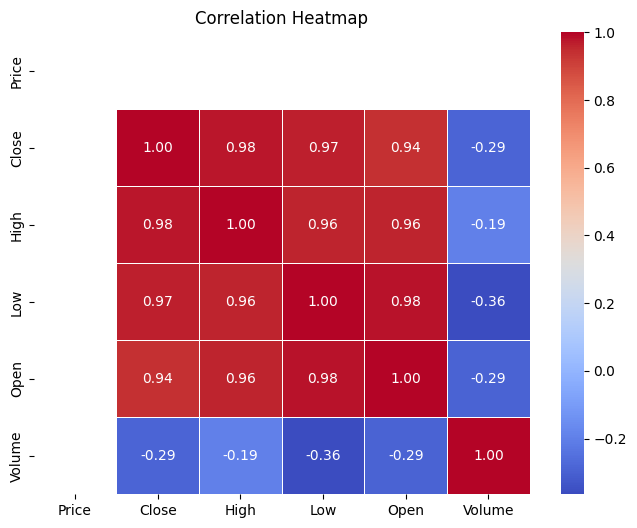

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
std_deviation = df.std()
print("Standard Deviation:\n", std_deviation)

Standard Deviation:
 Price              NaN
Close     1.723922e+00
High      1.621518e+00
Low       1.832908e+00
Open      1.754384e+00
Volume    1.716528e+06
dtype: float64


In [37]:
skewness = df.skew()
print("\nSkewness:\n", skewness)


Skewness:
 Price          NaN
Close    -0.458089
High     -0.353604
Low      -0.504823
Open     -0.485364
Volume    6.172418
dtype: float64


In [38]:
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode()

print(f"Mean:\n{mean_values}")
print(f"\nMedian:\n{median_values}")
print(f"\nMode:\n{mode_values}")

Mean:
Price              NaN
Close     2.516638e+02
High      2.520021e+02
Low       2.512029e+02
Open      2.515823e+02
Volume    1.462127e+06
dtype: float64

Median:
Price               NaN
Close        251.845001
High         252.340004
Low          251.215004
Open         251.630005
Volume    952616.500000
dtype: float64

Mode:
     Price       Close        High         Low        Open      Volume
0      NaN  249.820007  253.240005  249.860001  253.630005    492559.0
1      NaN  249.889999  253.389999         NaN         NaN    497985.0
2      NaN  250.059998         NaN         NaN         NaN    504826.0
3      NaN  250.619995         NaN         NaN         NaN    523817.0
4      NaN  251.039993         NaN         NaN         NaN    544706.0
..     ...         ...         ...         ...         ...         ...
125    NaN         NaN         NaN         NaN         NaN   5028317.0
126    NaN         NaN         NaN         NaN         NaN   5186324.0
127    NaN         NaN     

In [39]:
kurtosis_values = df.kurtosis()
print(f"Kurtosis:\n{kurtosis_values}")

Kurtosis:
Price           NaN
Close     -0.645322
High      -0.945428
Low       -0.552140
Open      -0.650181
Volume    50.235649
dtype: float64


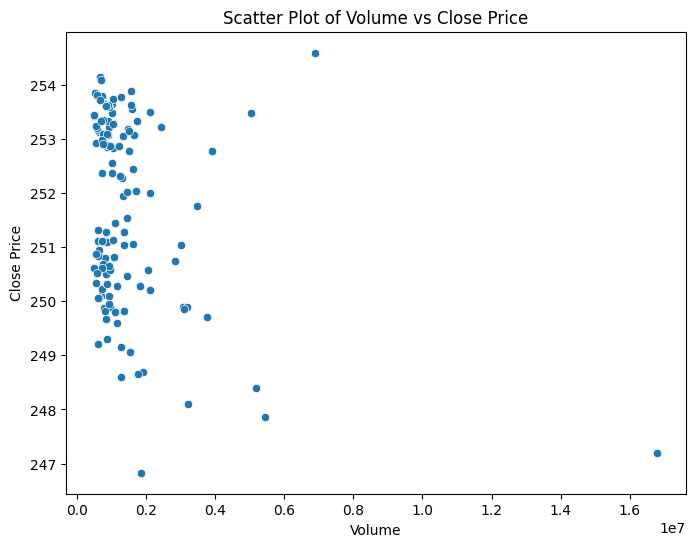

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Scatter Plot of Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

Correlation between Volume and Close: -0.29


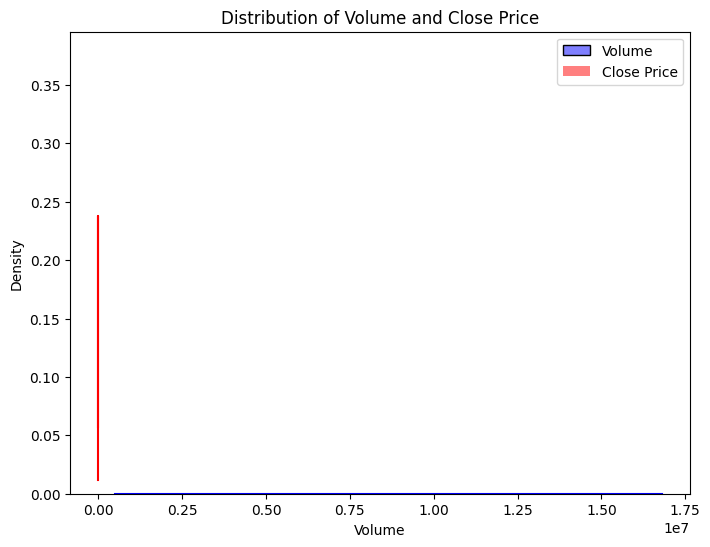

In [42]:
correlation = df['Volume'].corr(df['Close'])
print(f"Correlation between Volume and Close: {correlation:.2f}")

# Step 3: Investigate the distributions
plt.figure(figsize=(8, 6))
sns.histplot(df['Volume'], kde=True, color='blue', label='Volume', stat='density', bins=10)
sns.histplot(df['Close'], kde=True, color='red', label='Close Price', stat='density', bins=10)
plt.title('Distribution of Volume and Close Price')
plt.legend()
plt.show()

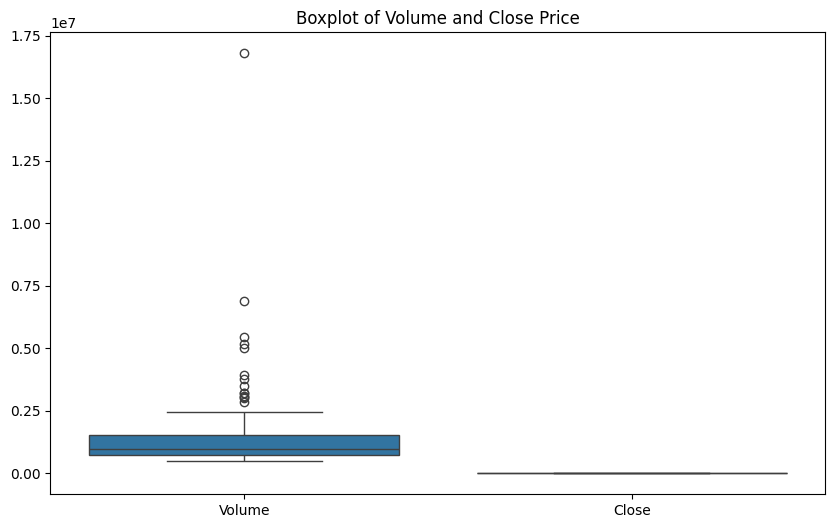

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Volume', 'Close']])
plt.title('Boxplot of Volume and Close Price')
plt.show()

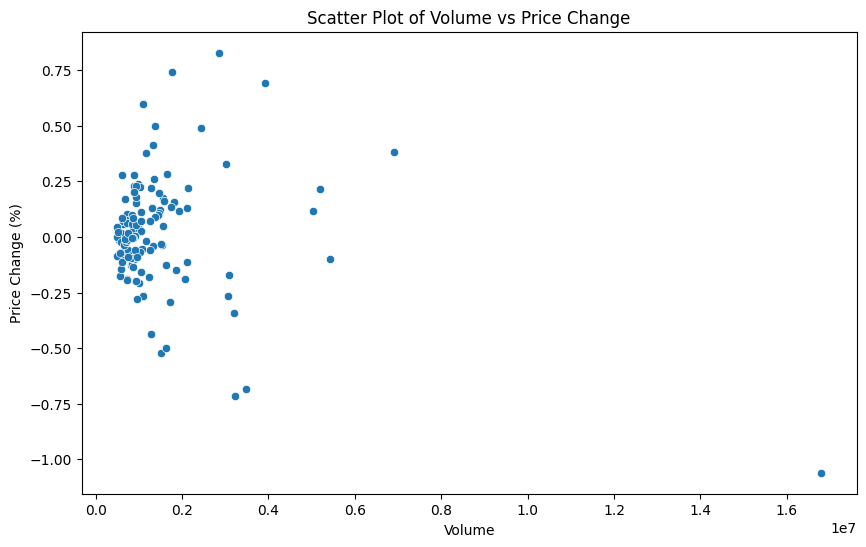

Correlation between Volume and Price Change: -0.24


In [45]:
df['Price_Change'] = df['Close'].pct_change() * 100  # percentage change

# Plot Volume vs Price Change
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Price_Change'])
plt.title('Scatter Plot of Volume vs Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change (%)')
plt.show()

# Calculate correlation between Volume and Price Change
correlation_price_change = df['Volume'].corr(df['Price_Change'])
print(f"Correlation between Volume and Price Change: {correlation_price_change:.2f}")

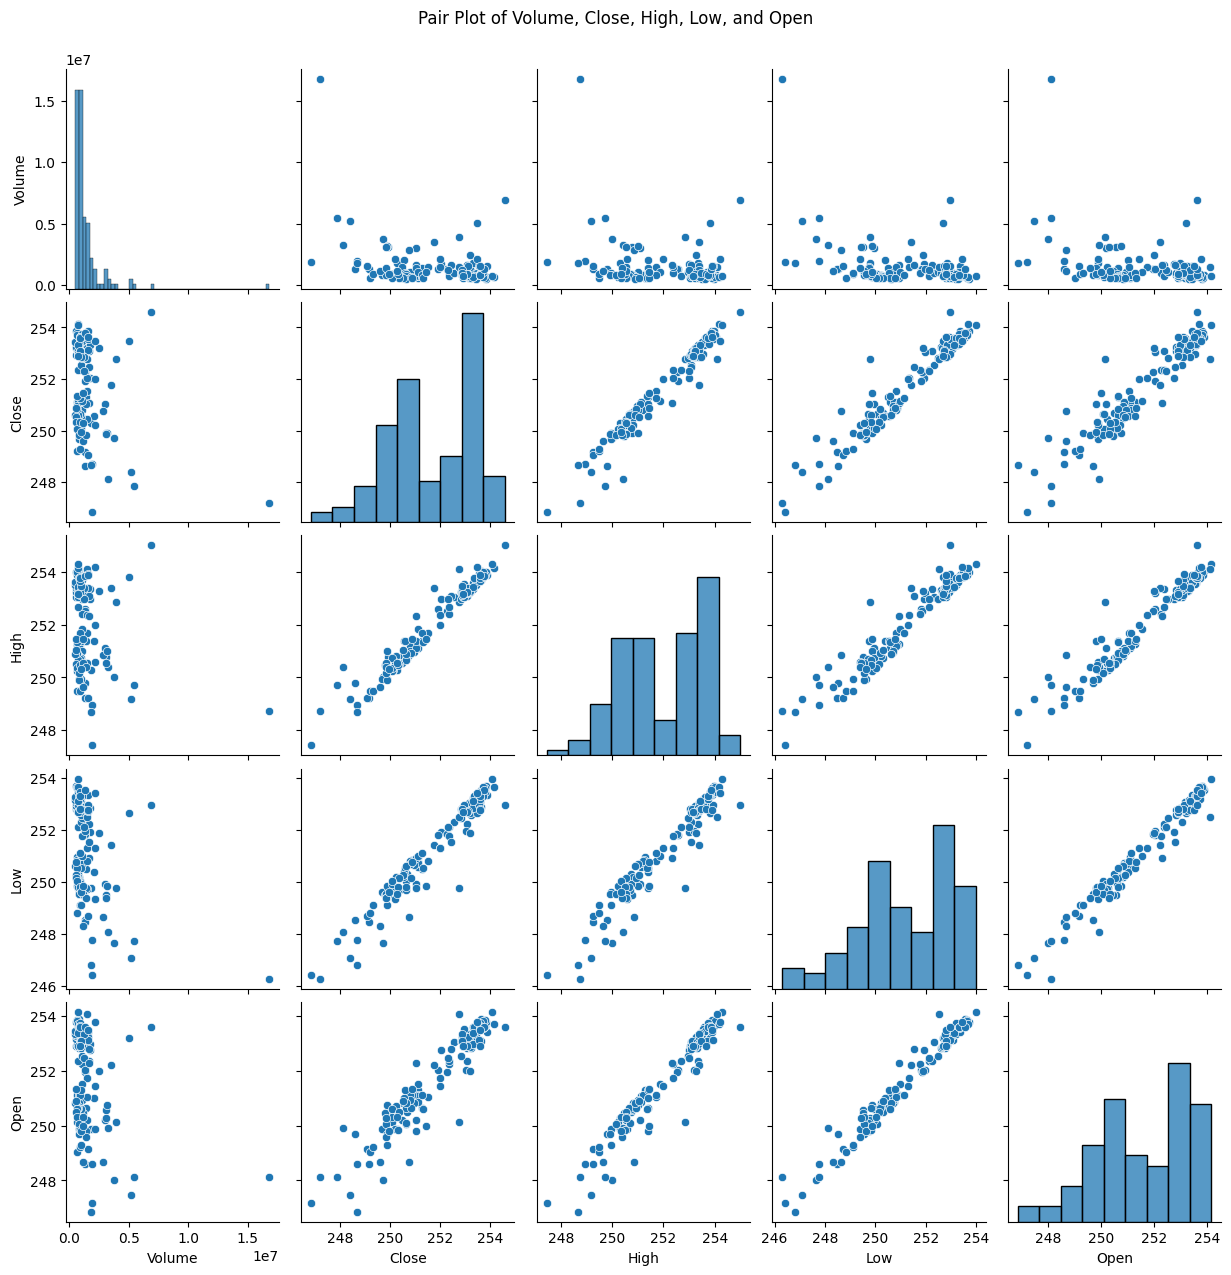

In [46]:
sns.pairplot(df[['Volume', 'Close', 'High', 'Low', 'Open']])
plt.suptitle('Pair Plot of Volume, Close, High, Low, and Open', y=1.02)
plt.show()

/var/folders/85/mlf9r_ss1yq4drx7n80x4v240000gn/T/ipykernel_21426/140682363.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Open', y='Close', data=df, palette='coolwarm')


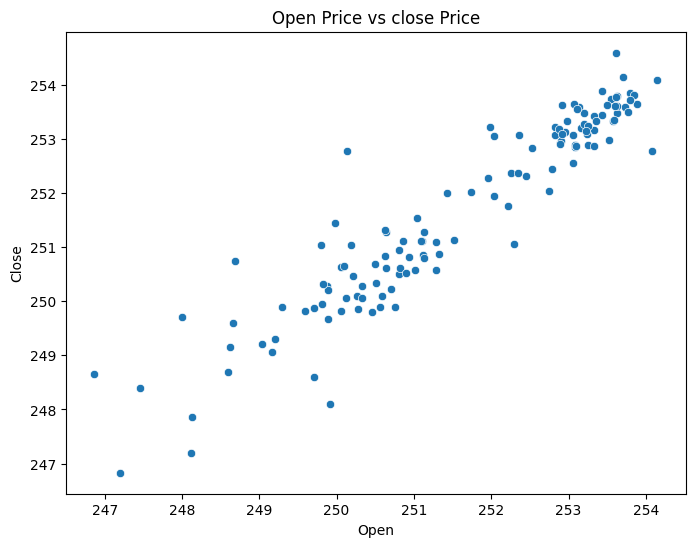

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open', y='Close', data=df, palette='coolwarm')
plt.title('Open Price vs close Price')
plt.show()